In [176]:
from scipy import signal as sg
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import glob

In [177]:
files = glob.glob("*.wav")
file = files[0]
print(file)

20211121_050319_192.wav


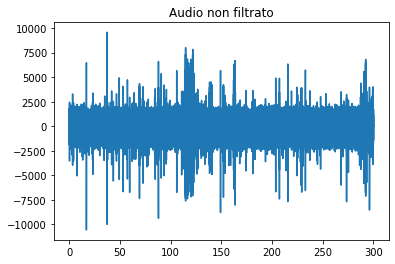

In [178]:
sr,wav = wavfile.read(file)
N = wav.shape[0]
t = np.arange(N) / sr
plt.plot(t, wav)
plt.title("Audio non filtrato")
plt.show()

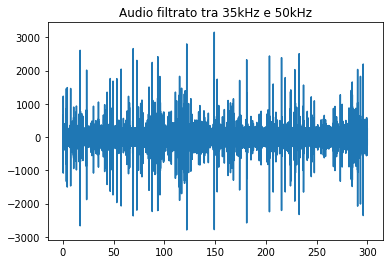

In [179]:
low_band = 35e3
high_band = 50e3
filter = sg.butter(4, [low_band, high_band], btype='bandpass', analog=False, output='sos', fs=sr)
wav = sg.sosfilt(filter, wav)
plt.plot(t, wav)
plt.title("Audio filtrato tra 35kHz e 50kHz")
plt.show()

In [180]:
chunk_length = 1  #sec
chunk_size = int(chunk_length*sr)
chunk_step = chunk_size#//2
freqs = None
time = None
Sxx_v = []
for i in range(0, N, chunk_step):
    f, t, Sxx = sg.spectrogram(wav[i : i+chunk_size], sr)
    if freqs is None:
        freqs = f
        time = t
    Sxx_v.append(Sxx)
print(len(Sxx_v))

301


In [185]:
n = 120    # click molto larghi
#n = 164     # singolo click? isolato
#n = 3*60+55    # assenza di click
#n = 4*60+44    # tanti click stretti
time_plot = time + n

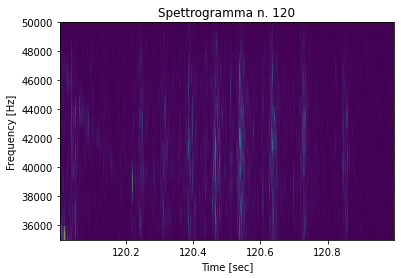

In [186]:
plt.pcolormesh(time_plot, freqs, Sxx_v[n], shading="gouraud")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title(f"Spettrogramma n. {n}")
plt.ylim([low_band, high_band])
plt.show()

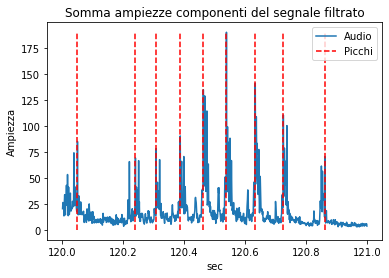

In [187]:
onda_tot = np.sum(Sxx_v[n], axis=0)
peaks, props = sg.find_peaks(onda_tot, height=np.mean(onda_tot)*3, distance=50)
plt.plot(time_plot, onda_tot)
plt.vlines(time_plot[peaks], 0, np.max(onda_tot),
           colors="red", linestyles="dashed")
plt.title("Somma ampiezze componenti del segnale filtrato")
plt.legend(["Audio", "Picchi"])
plt.xlabel("sec")
plt.ylabel("Ampiezza")
plt.show()


In [188]:
if peaks.shape[0]>=5:
    print("DELFINO SI")
else:
    print("DELFINO NO")

DELFINO SI
